# Análise e Classificação de Faces: Visão Computacional com OpenCV
## Objetivos
* Seja capaz de extrair regiões de interesse de uma imagem.
* Normalize e pré-processe conjunto de dados de imagens.
* Construa classificadores para reconhecimento de faces.
* Valide a precisão do modelo construído para posterior aplicação em aplicações do mundo real.
* Extraia regiões do rosto humano baseado em marcos faciais.
* Crie aplicações que analise diferentes condições de cada componente do rosto humano.

Link: https://cursos.alura.com.br/course/analise-classificacao-faces-visao-computacional-opencv

## Importando as bibliotecas

In [144]:
import os
from os import listdir
from os.path import isfile, join
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import dlib
from sklearn.metrics import accuracy_score

## Importando os dados e separando os dados em treino e teste

In [2]:
faces_path = 'imagens/cropped_faces/'

lista_arq_faces = [f for f in os.listdir(faces_path) if isfile(join(faces_path, f))]
lista_arq_faces[:10]

['s01_01.jpg',
 's01_02.jpg',
 's01_03.jpg',
 's01_04.jpg',
 's01_05.jpg',
 's01_06.jpg',
 's01_07.jpg',
 's01_08.jpg',
 's01_09.jpg',
 's01_10.jpg']

In [3]:
faces_path_treino = 'imagens/treino/'
faces_path_teste = 'imagens/teste/'

if not os.path.exists(faces_path_treino):
    os.makedirs(faces_path_treino)
    
if not os.path.exists(faces_path_teste):
    os.makedirs(faces_path_teste)

In [4]:
for arq in lista_arq_faces:
    sujeito = arq[1:3]
    numero = arq[4:6]
    
    if int(numero) <= 10:
        shutil.copyfile(faces_path + arq, faces_path_treino + arq)
    else:
        shutil.copyfile(faces_path + arq, faces_path_teste + arq)

In [5]:
faces_path_treino + arq

'imagens/treino/s50_15.jpg'

In [6]:
faces_path_teste

'imagens/teste/'

## Padronizando as imagens

* Convertendo os espaços de cores das imagens 
* Dimensionando as imagens para todas terem o mesmo tamanho

A padronização num tamanho mediano considerando todas as imagens é o caminho ideal. Assim não criamos artefatos muito grandes quando as imagens muito pequenas forem aumentadas, nem quando as imagens grandes forem diminuídas. Com isso, os valores médios de brilhos, entre as imagens, podem ser comparadas.

In [7]:
def padronizar_imagens(imagem_caminho):
    imagem = cv2.imread(imagem_caminho, cv2.IMREAD_GRAYSCALE)
    imagem = cv2.resize(imagem, (200,200), interpolation=cv2.INTER_LANCZOS4)
    return imagem

In [8]:
lista_faces_treino = [f for f in os.listdir(faces_path_treino) if isfile(join(faces_path_treino, f))]
lista_faces_teste = [f for f in os.listdir(faces_path_teste) if isfile(join(faces_path_teste, f))]

In [9]:
dados_treinamento, sujeitos = [], []

for i, arq in enumerate(lista_faces_treino):
    imagem_path = faces_path_treino + arq
    imagem = padronizar_imagens(imagem_path)
    dados_treinamento.append(imagem)
    sujeito = arq[1:3]
    sujeitos.append(int(sujeito))

In [10]:
len(dados_treinamento)

500

In [11]:
dados_teste, sujeitos_teste = [], []

for i, arq in enumerate(lista_faces_teste):
    imagem_path = faces_path_teste + arq
    imagem = padronizar_imagens(imagem_path)
    dados_teste.append(imagem)
    sujeito = arq[1:3]
    sujeitos_teste.append(int(sujeito))

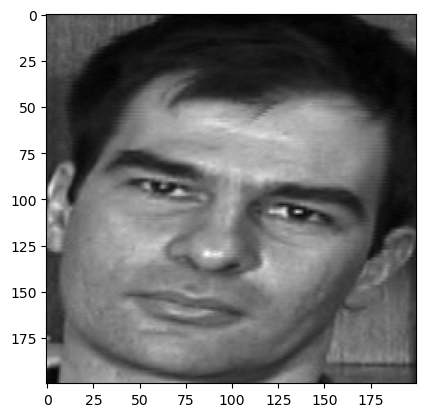

In [13]:
plt.imshow(dados_teste[0], cmap='gray')
plt.show()

In [15]:
sujeitos = np.asarray(sujeitos, dtype=np.int32)
sujeitos_teste = np.asarray(sujeitos_teste, dtype=np.int32)

## Modelo 01 - Eigenfaces

Modelo básico, funciona melhor com imagens padronizados

In [53]:
modelo_eigenfaces = cv2.face.EigenFaceRecognizer_create()
modelo_eigenfaces.train(dados_treinamento, sujeitos)

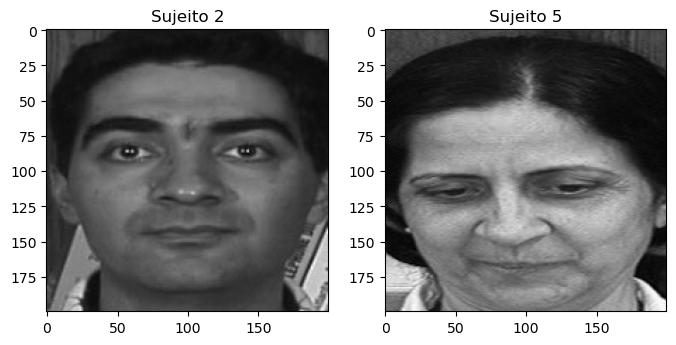

In [54]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8,10))

ax1.set_title('Sujeito ' + str(sujeitos_teste[7]))
ax1.imshow(dados_teste[7], cmap='gray')

ax2.set_title('Sujeito ' + str(sujeitos_teste[21]))
ax2.imshow(dados_teste[20], cmap='gray')

plt.show()

In [55]:
predicao = modelo_eigenfaces.predict(dados_teste[7])
predicao

(2, 3820.568961327711)

In [56]:
predicao = modelo_eigenfaces.predict(dados_teste[21])
predicao

(5, 5825.7391925922775)

## Modelo 02 - Fisherfaces
Modelo que busca maximizar a variacia entre as classes

Possui melhor resultado quando as imagens possuem melhor qualidade, são padronizados e possem menor ruido

In [58]:
modelo_fisherfaces = cv2.face.FisherFaceRecognizer_create()
modelo_fisherfaces.train(dados_treinamento, sujeitos)

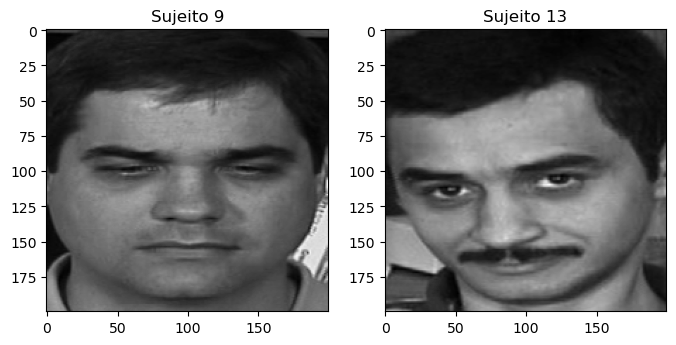

In [71]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8,10))

ax1.set_title('Sujeito ' + str(sujeitos_teste[41]))
ax1.imshow(dados_teste[41], cmap='gray')

ax2.set_title('Sujeito ' + str(sujeitos_teste[61]))
ax2.imshow(dados_teste[61], cmap='gray')

plt.show()

In [69]:
predicao = modelo_fisherfaces.predict(dados_teste[41])
predicao

(9, 1048.2453924767965)

In [68]:
predicao = modelo_fisherfaces.predict(dados_teste[61])
predicao

(13, 708.8099491534082)

## Modelo 03 - LBPH (local binary pattern histogram)

Modelo muito robusto que atenua efeitos de ilumininação e ruido que pode influenciar os dois modelos anteriores

In [73]:
modelo_lbph = cv2.face.LBPHFaceRecognizer_create()
modelo_lbph.train(dados_treinamento, sujeitos)

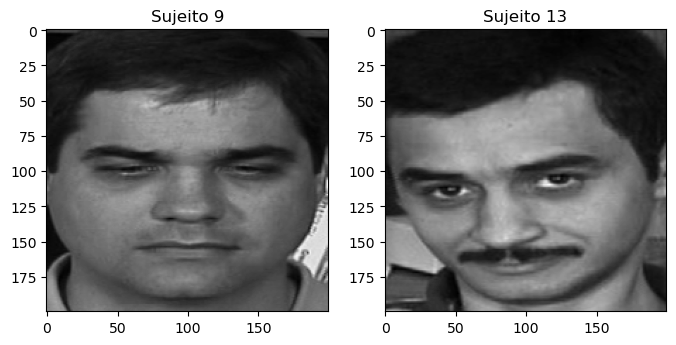

In [86]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8,10))

ax1.set_title('Sujeito ' + str(sujeitos_teste[41]))
ax1.imshow(dados_teste[41], cmap='gray')

ax2.set_title('Sujeito ' + str(sujeitos_teste[61]))
ax2.imshow(dados_teste[61], cmap='gray')

plt.show()

In [87]:
predicao = modelo_lbph.predict(dados_teste[41])
predicao

(9, 40.017323176989386)

In [88]:
predicao = modelo_lbph.predict(dados_teste[61])
predicao

(13, 34.82008662105248)

In [102]:
y_pred_eigenfaces = []

for item in dados_teste:
    y_pred_eigenfaces.append(modelo_eigenfaces.predict(item)[0])

acuracia_eigenfaces = accuracy_score(sujeitos_teste, y_pred_eigenfaces)
acuracia_eigenfaces

0.724

In [101]:
y_pred_fisherfaces = []

for item in dados_teste:
    y_pred_fisherfaces.append(modelo_fisherfaces.predict(item)[0]) 

acuracia_fisherfaces = accuracy_score(sujeitos_teste, y_pred_fisherfaces)
acuracia_fisherfaces

0.52

In [100]:
y_pred_lbph = []

for item in dados_teste:
    y_pred_lbph.append(modelo_lbph.predict(item)[0])
    
acuracia_lbph = accuracy_score(sujeitos_teste, y_pred_lbph)
acuracia_lbph

0.792

## Utilizando o video

In [156]:
from io import BytesIO
from IPython.display import clear_output, Image, display
from PIL import Image as Img

def padronizar_imagem(imagem):
    imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
    imagem = cv2.resize(imagem, (400,300))
    return imagem

def exibir_video(frame):
    img = Img.fromarray(frame, "RGB")
    buffer = BytesIO()
    img.save(buffer, format="JPEG")
    display(Image(data=buffer.getvalue()))
    clear_output(wait=True)

In [154]:
captura_video = cv2.VideoCapture(0)

try:
    while(True):
        captura_ok, frame = captura_video.read()

        if captura_ok:
            frame = padronizar_imagem(frame)
            exibir_video(frame)

except KeyboardInterrupt:
    captura_video.release()
    print("Interrompido")

Interrompido


In [157]:
captura_video = cv2.VideoCapture(0)

classificador_face = cv2.CascadeClassifier(r'E:\Anaconda3\Lib\site-packages\cv2\data\haarcascade_frontalface_default.xml')

contador = 0

try:
    while(True):
        captura_ok, frame = captura_video.read()

        if captura_ok:
            frame = padronizar_imagem(frame)
            frame_gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)

            faces = classificador_face.detectMultiScale(frame_gray, 1.3, 5)

            if len(faces) > 0:
                contador += 1
                if contador <= 100:
                    for (x,y,w,h) in faces:
                        roi = frame_gray[y:y+h, x:x+w]
                        cv2.resize(roi, (200, 200), interpolation=cv2.INTER_LANCZOS4)
                        cv2.imwrite("imagens/guilherme/" + str(contador) + ".png", roi)
                    cv2.putText(frame, "Coletado " + str(contador) + " faces", (20,20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,0), 2)
                else:
                    cv2.putText(frame, "Concluido", (20,20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,0), 2)

            exibir_video(frame)

except KeyboardInterrupt:
    captura_video.release()
    print("Interrompido")

Interrompido


In [159]:
faces_caminho_treinamento = "imagens/guilherme/"
lista_faces_treinamento = [f for f in listdir(faces_caminho_treinamento) if isfile(join(faces_caminho_treinamento, f))]

In [160]:
dados_treinamento, sujeitos = [], []

for i, arquivo in enumerate(lista_faces_treinamento):
    imagem_caminho = faces_caminho_treinamento + arquivo
    imagem = cv2.imread(imagem_caminho, cv2.IMREAD_GRAYSCALE)
    dados_treinamento.append(imagem)
    sujeitos.append(0)

sujeitos = np.asarray(sujeitos, dtype=np.int32)

In [161]:
model_lbph = cv2.face.LBPHFaceRecognizer_create()
model_lbph.train(dados_treinamento, sujeitos)

In [162]:
captura_video = cv2.VideoCapture(0)

classificador_face = cv2.CascadeClassifier(r'E:\Anaconda3\Lib\site-packages\cv2\data\haarcascade_frontalface_default.xml')

contador = 0

try:
    while(True):
        captura_ok, frame = captura_video.read()

        if captura_ok:
            frame = padronizar_imagem(frame)
            frame_gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
            faces = classificador_face.detectMultiScale(frame_gray, 1.3, 5)

            if len(faces) > 0:
                for (x,y,w,h) in faces:
                    roi = frame_gray[y:y+h, x:x+w]
                    roi = cv2.resize(roi, (200, 200), interpolation=cv2.INTER_LANCZOS4)
                    predicao = model_lbph.predict(roi)
                    cv2.putText(frame, "Similaridade " + str(predicao[1]), (x,y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,0), 2)

            exibir_video(frame)

except KeyboardInterrupt:
    captura_video.release()
    print("Interrompido")

Interrompido
